## **Description**

### **Background and Context:**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

### **Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

### **Dataset:**

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                             
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone
 

### **Objective:**

To implement the techniques learned as a part of the course.


### **Learning Outcomes:**

* Basic understanding of text pre-processing.
* What to do after text pre-processing
* Bag of words
* Tf-idf
* Build the classification model.
* Evaluate the Model


##**Steps:**
- Import the necessary libraries
- Get the data
- Explore the data
- Do feature engineering (create relevant columns based on existing columns)
- Plot the wordcloud based on the relevant column
- Do pre-processing
- Noise removal (Special character, html tags, numbers, 
stopword removal)
- Lowercasing
- Stemming / lemmatization
- Text to number: Vectorization
- CountVectorizer
- TfidfVectorizer
- Build Machine Learning Model for Text Classification.
- Optimize the parameter
- Plot the worldcloud based on the most important features
- Check the performance of the model
- Summary


In [1]:
!pip install contractions

In [2]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score

import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# load dataset
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Introduction to Natural Language Processing/Project 9/Tweets.csv')

In [5]:
data.shape                                               # print shape of data.

(14640, 15)

Dataset has 14640 rows and 15 columns.

In [6]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Most of the columns has NaN value.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

* **int64 columns:** tweet_id, retweet_count
* **float64 columns:** airline_sentiment_confidence, negativereason_confidence
* **object columns:** airline_sentiment, negativereason, airline, airline_sentiment_gold, name, negativereason_gold, text, tweet_coord, tweet_created, tweet_location, user_timezone

In [8]:
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

- Almost all data has null values in airline_sentiment_gold, negativereason_gold and tweet_coord columns.
- 1/3rd data has null values in negativereason, negativereason_confidence, tweet_location and user_timezone columns.

### **EDA**

In [9]:
# Function to create barplots that indicate percentage for each category.


def univariate_cat_plot(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(x=data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

In [10]:
# Unique values of sentiment
print('Sentiments', data['airline_sentiment'].unique())

Sentiments ['neutral' 'positive' 'negative']


3 unique values of sentiment in dataset

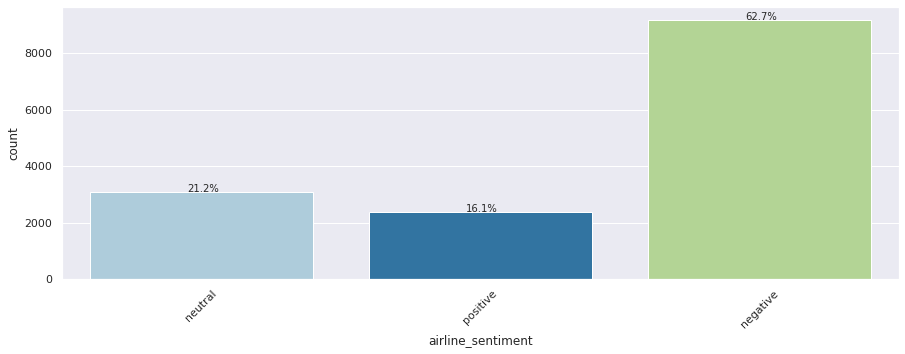

In [11]:
univariate_cat_plot(data, "airline_sentiment")

* negative 62.7 % of the dataset
* neutral 21.2 % of the dataset
* positive 16.1 % of the dataset

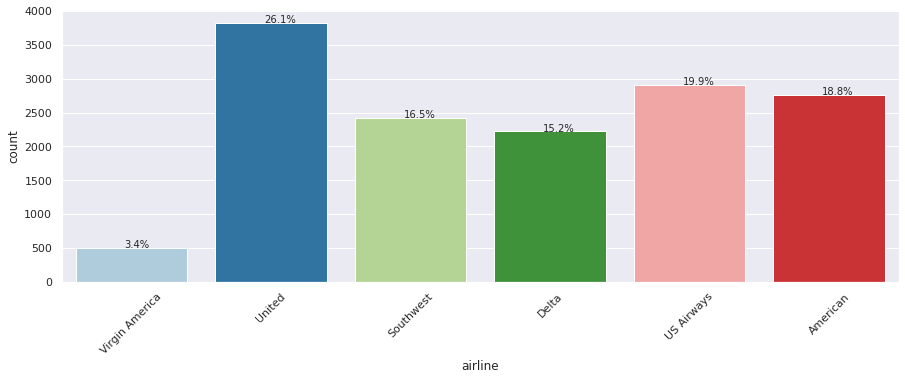

In [12]:
univariate_cat_plot(data, "airline")

United has more tweets than other airlines. US Airways and American are in 2nd and 3rd place.

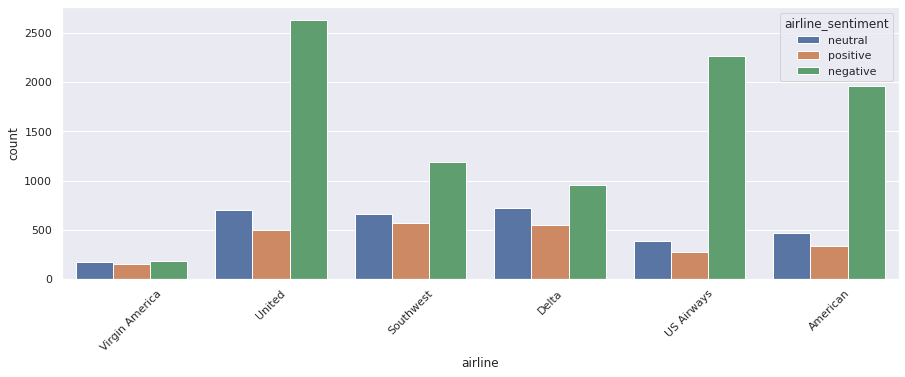

In [13]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.countplot(data=data, x="airline", hue="airline_sentiment")

United has most of the negative tweets, then US Airways and American has negative tweets.

United, Southwest and Delta has almost same positive and neutral tweets.

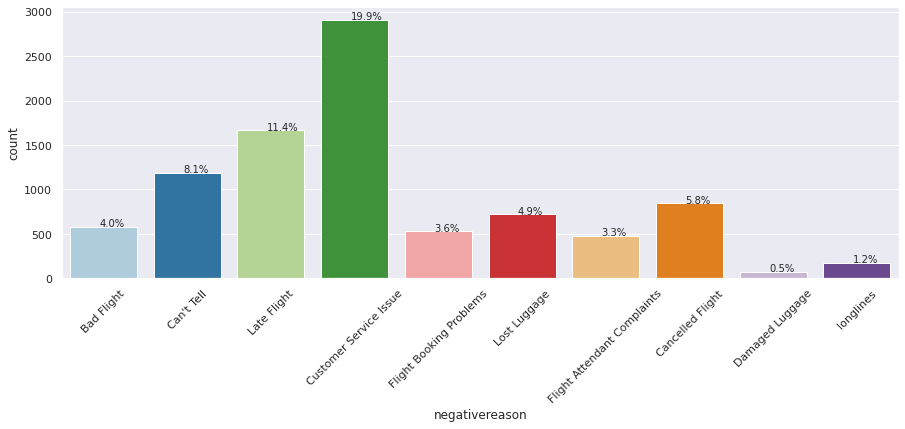

In [14]:
univariate_cat_plot(data, "negativereason")

Most negative tweets on "Customer Service Issue", then comes "Late Flight" and "Can't Tell".

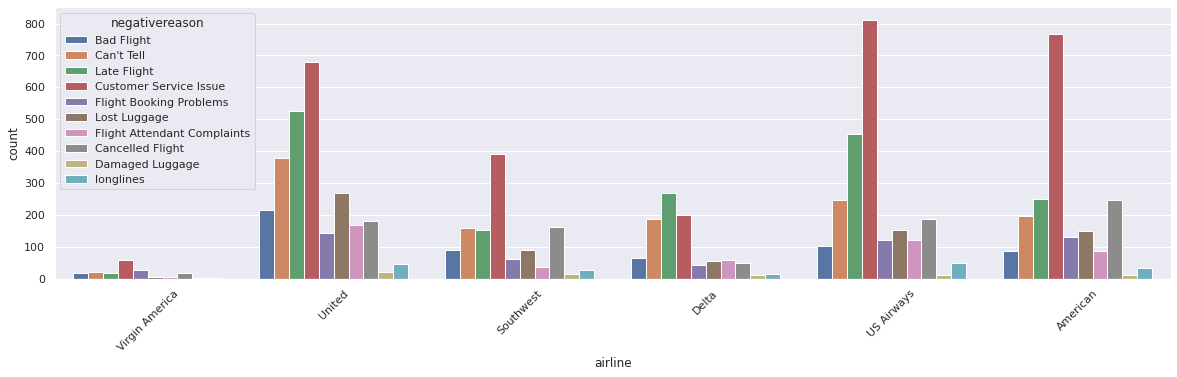

In [15]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
sns.countplot(data=data, x="airline", hue="negativereason")

- US Airways has highest negative tweets on 'Customer Service Issue', then American and United
- United has highest negative tweets on 'Late Flight', then US Airways and Delta.
- United has highest negative tweets on "Can't Tell".

### **Text Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

In [16]:
# Only keeping relevant columns from the data, as these are useful for our analysis.

df = data[['airline_sentiment','text']]

In [17]:
df.duplicated().sum()  # checking for duplicate values

188

188 duplicate data in dataset

In [18]:
df = df.drop_duplicates()  # dropping duplicate values from dataset

In [19]:
df.duplicated().sum()  # checking for duplicate values

0

In [20]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [21]:
# Removing HTML
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

df['text'] = df['text'].apply(lambda x: strip_html(x))

df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [22]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df['text'] = df['text'].apply(lambda x: replace_contractions(x))

df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [23]:
# Removing Numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_numbers(x))

df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [24]:
# Removing Tweet Account
def remove_tweet_account(text):
  text = re.sub(r'@\w+', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_tweet_account(x))

df.head()

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you have added commercials to the experi...
2,neutral,I did not today... Must mean I need to take a...
3,negative,"it is really aggressive to blast obnoxious ""e..."
4,negative,and it is a really big bad thing about it


In [25]:
# Removing Website URl
def remove_website_urls(text):
  text = re.sub(r'http\S+', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_website_urls(x))

df.head()

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you have added commercials to the experi...
2,neutral,I did not today... Must mean I need to take a...
3,negative,"it is really aggressive to blast obnoxious ""e..."
4,negative,and it is a really big bad thing about it


In [26]:
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [27]:
df.head()                                                                  # Look at how tokenized data looks.

,airline_sentiment,text
0,neutral,"[What, said, .]"
1,positive,"[plus, you, have, added, commercials, to, the,..."
2,neutral,"[I, did, not, today, ..., Must, mean, I, need,..."
3,negative,"[it, is, really, aggressive, to, blast, obnoxi..."
4,negative,"[and, it, is, a, really, big, bad, thing, abou..."


In [28]:
stopwords = stopwords.words('english')
new_stopwords = ['flight', 'airline', 'airlines']
stopwords.extend(new_stopwords)

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.
# also added 'flight', 'airline' and 'airlines'

stopwords = list(set(stopwords) - set(customlist))                              

In [29]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)

df.head()

,airline_sentiment,text
0,neutral,say
1,positive,plus add commercials experience tacky
2,neutral,not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


### **Word Cloud based on Sentiments**



In [30]:
import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

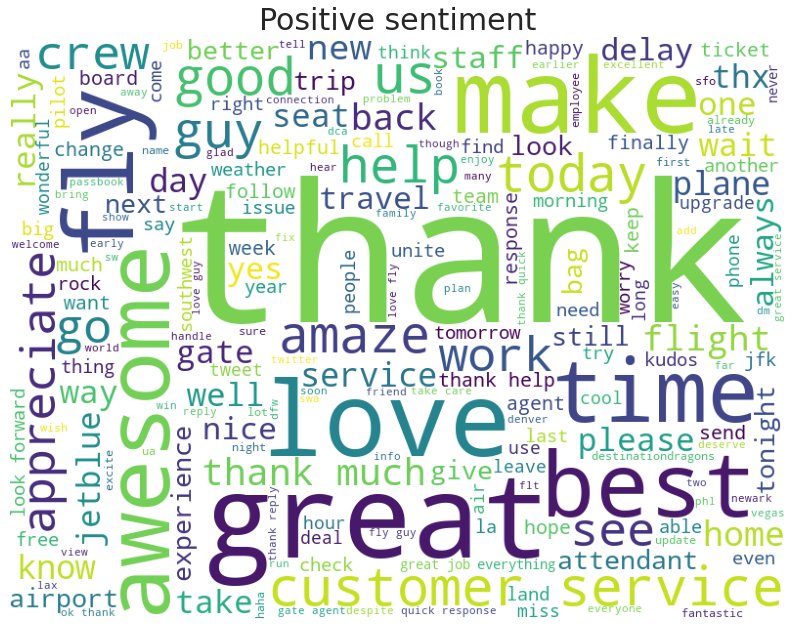

In [31]:
show_wordcloud(df[df.airline_sentiment == 'positive'], title = "Positive sentiment")

- Consumers are tweets positive about thank, great, love, customer service & fly as their experience.


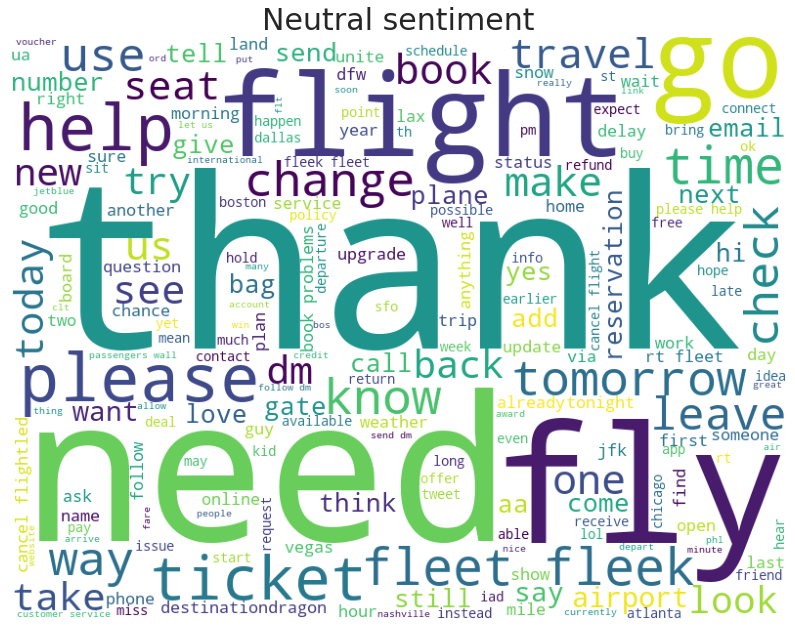

In [32]:
show_wordcloud(df[df.airline_sentiment == 'neutral'], title = "Neutral sentiment")

- Customers are tweets neutral about thank, need, flight fly & ticket.

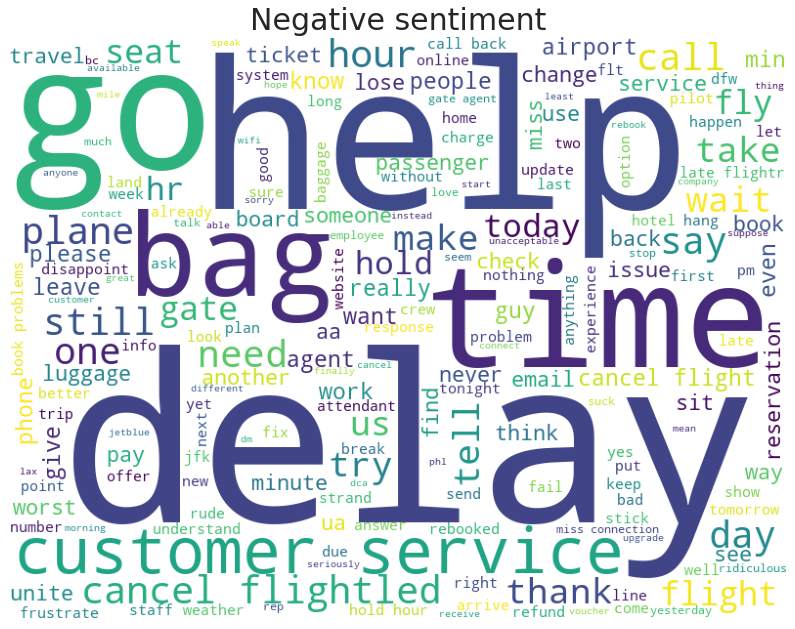

In [33]:
show_wordcloud(df[df.airline_sentiment == 'negative'], title = "Negative sentiment")

- Customers are tweets negative or complaining about delay, time,  help & bag .

### **Building the model based on CountVectorizer and Random Forest**

In [34]:
def model_eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);
    plt.figure(figsize=(10,7))

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['negative','neutral','positive']);
    ax.yaxis.set_ticklabels(['negative','neutral','positive']);

In [35]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(df['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [36]:
data_features.shape

(14452, 2000)

In [37]:
labels = df['airline_sentiment']

In [38]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [39]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7392748400312041


### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [40]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [41]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

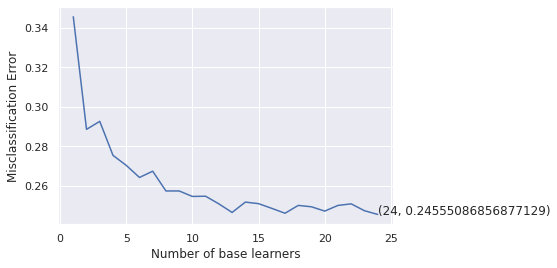

In [42]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [43]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7559963099630996

In [44]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

Test_Set
              precision    recall  f1-score   support

    negative       0.81      0.89      0.85      2741
     neutral       0.58      0.48      0.53       903
    positive       0.68      0.58      0.63       692

    accuracy                           0.76      4336
   macro avg       0.69      0.65      0.67      4336
weighted avg       0.74      0.76      0.75      4336

Train_Set
              precision    recall  f1-score   support

    negative       1.00      0.99      0.99      6346
     neutral       0.97      0.98      0.98      2164
    positive       0.98      0.98      0.98      1606

    accuracy                           0.99     10116
   macro avg       0.98      0.98      0.98     10116
weighted avg       0.99      0.99      0.99     10116



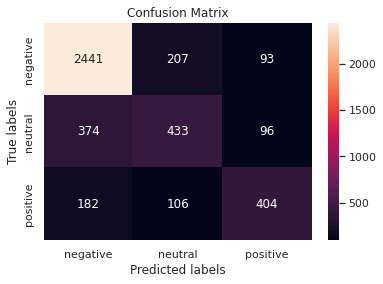

<Figure size 720x504 with 0 Axes>

In [45]:
model_eval(clf, X_train, X_test)

### **Word Cloud of top 20 important features from the CountVectorizer + Random Forest based model**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


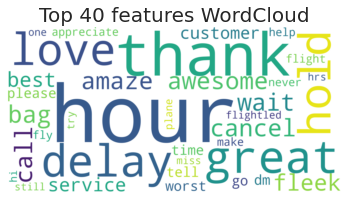

In [46]:


all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

- hour, thank, great, hold & delay are the mostly used feature in the tweets.

### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [47]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(df['text'])

data_features = data_features.toarray()

data_features.shape

(14452, 2000)

In [48]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [49]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7551902994497899


In [50]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

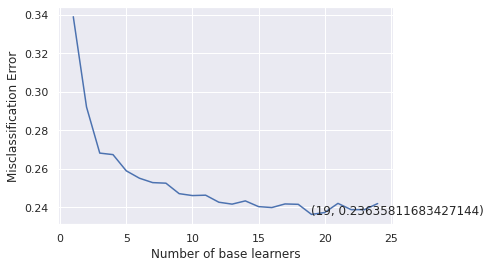

In [51]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [52]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7596863468634686

In [53]:
result = clf.predict(X_test)

Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.90      0.85      2741
     neutral       0.61      0.49      0.54       903
    positive       0.71      0.54      0.61       692

    accuracy                           0.76      4336
   macro avg       0.71      0.64      0.67      4336
weighted avg       0.75      0.76      0.75      4336

Train_Set
              precision    recall  f1-score   support

    negative       0.99      0.99      0.99      6346
     neutral       0.97      0.97      0.97      2164
    positive       0.98      0.98      0.98      1606

    accuracy                           0.99     10116
   macro avg       0.98      0.98      0.98     10116
weighted avg       0.99      0.99      0.99     10116



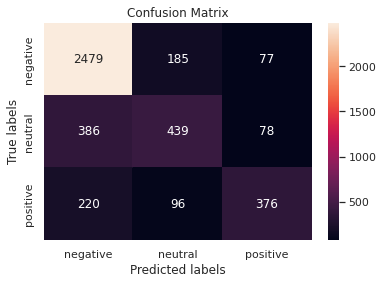

<Figure size 720x504 with 0 Axes>

In [54]:
model_eval(clf, X_train, X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


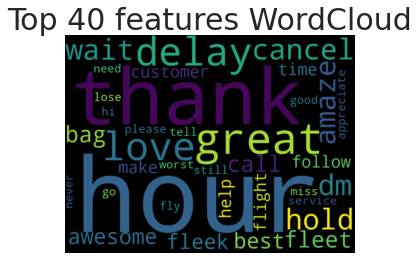

In [55]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

- hour, thank, great, love, hold & delay are the mostly used feature in tweets

### **Summary**:

- We used a dataset which has **reviews in text format and their sentiment score on the scale of 1 to 5.**
- The goal was to **build a model for text-classification**.
- We **created the sentiment and usefulness column** based on the score and helpfulness column.
- We **pre-processed the data** using various techniques and libraries.
- We **created a Word Cloud plot** based on summary and high and low score.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model.
- We trained the model and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
- However, **we can still increase the accuracy of our model by increasing the dataset we took into account for the model building** (We've currently only used 50,000 entries out of around 500,000 entries, which means **we built our current model using just 10% of the dataset**) 
- We can also increase the **max_feature parameter** in the vectorizer. 
- We can apply **other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further.